<a href="https://colab.research.google.com/github/KaleenaAnn/DataMonster/blob/main/Copy_of_Laberge_Kaleena_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd

# Convert features and targets to DataFrames
X_df = pd.DataFrame(X)
# Extract the 'y' column from the DataFrame and create a Series
y_df = pd.Series(y['y']) # Assuming the target column is named 'y'

# 1. Basic Overview
print("Shape of the data:", X_df.shape)
print("\nFirst few rows of the data:\n", X_df.head())
print("\nSummary statistics:\n", X_df.describe())

# 2. Data Types
print("\nData types:\n", X_df.dtypes)

# 3. Missing Values
print("\nMissing values:\n", X_df.isnull().sum())

# 4. Unique values for categorical features
for column in X_df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{column}':", X_df[column].unique())

Shape of the data: (45211, 16)

First few rows of the data:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

Summary statistics:
           

In [ ]:
import pandas as pd

# Descriptive statistics for features
print("\nDescriptive statistics for features:\n", X_df.describe(include='all'))

# Descriptive statistics for the target variable
print("\nDescriptive statistics for the target variable:\n", y_df.describe()) # Use y_df instead of y_series

# Select only numeric columns for correlation calculation
numeric_features = X_df.select_dtypes(include=['number']) # Filter for numeric types

# Correlation matrix for numeric features
print("\nCorrelation matrix for the features:\n", numeric_features.corr())



Descriptive statistics for features:
                  age          job  marital  education default        balance  \
count   45211.000000        44923    45211      43354   45211   45211.000000   
unique           NaN           11        3          3       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Convert features and targets to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.Series(y['y'])

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}  # Store encoders for each categorical feature

# Fit and transform categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_df[feature] = le.fit_transform(X_df[feature])
    label_encoders[feature] = le  # Store the encoder

# Encode the target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_df)
y_df_encoded = pd.Series(y_encoded)

# Descriptive statistics for features
print("\nDescriptive statistics for features:\n", X_df.describe(include='all'))

# Descriptive statistics for the target variable
print("\nDescriptive statistics for the target variable:\n", y_df_encoded.describe())

# Correlation matrix for the features
print("\nCorrelation matrix for the features:\n", X_df.corr())


Descriptive statistics for features:
                 age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      4.339762      1.167725      1.224813      0.018027   
std       10.618762      3.272657      0.608230      0.747997      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact   day_of_week  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058      0.555838      0.160226      0.640242     15.806419   
std      

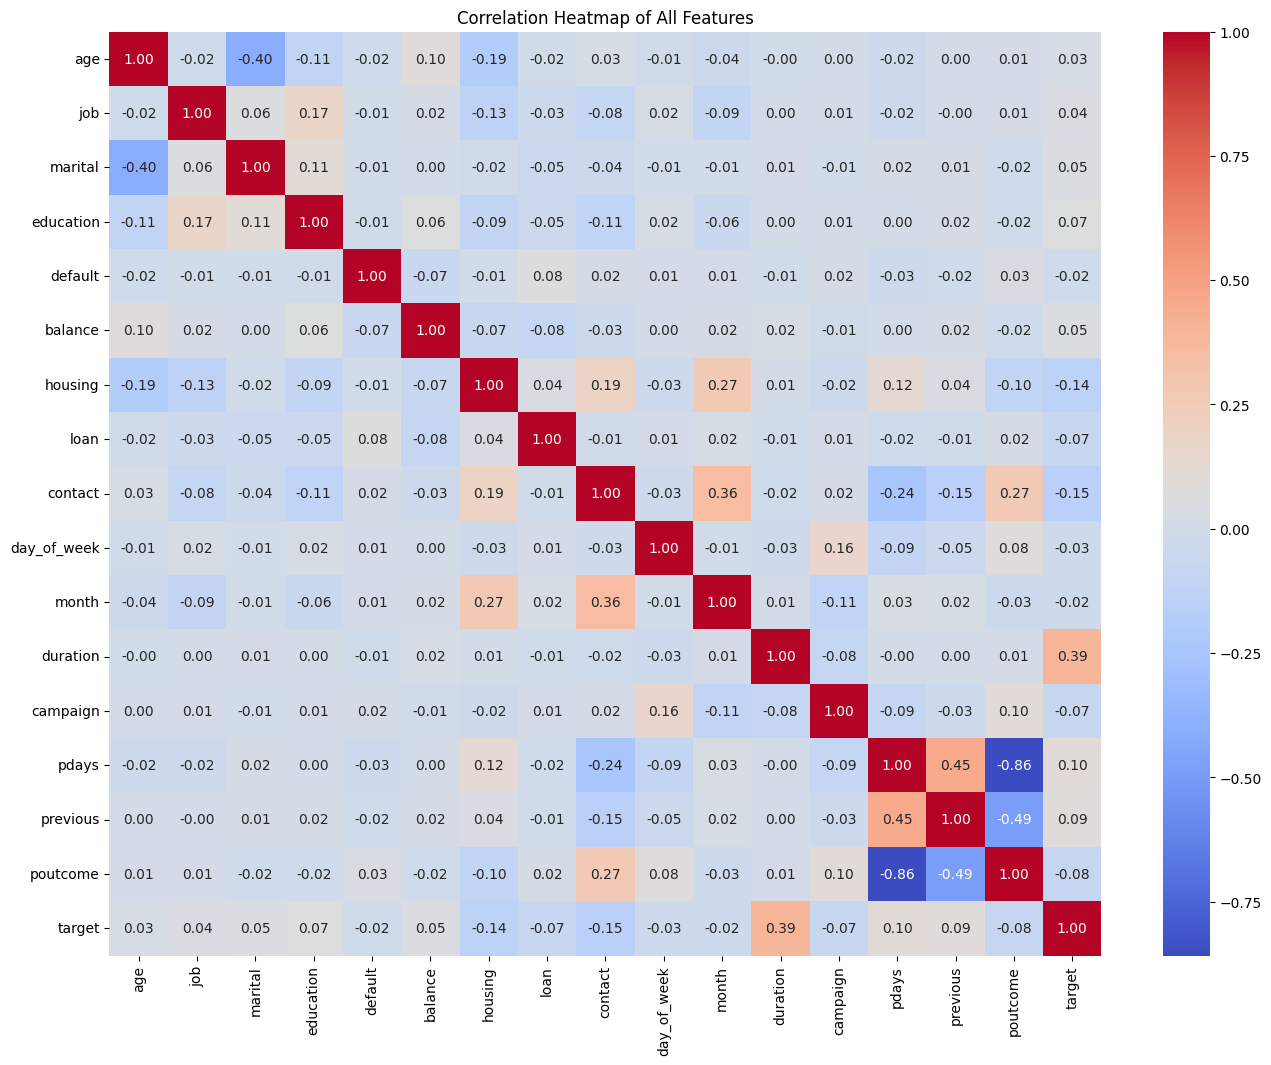

In [ ]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Convert features and targets to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.Series(y['y'])

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}

# Fit and transform categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_df[feature] = le.fit_transform(X_df[feature])
    label_encoders[feature] = le

# Encode the target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_df)
y_df_encoded = pd.Series(y_encoded)

# Include the encoded target variable in the DataFrame for the heatmap
X_df['target'] = y_df_encoded

# Calculate correlation matrix
corr_matrix = X_df.corr()

# Create heatmap
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()

In [ ]:
#Split the data into 70% train, 30% test
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data as pandas DataFrames
X_df = bank_marketing.data.features
y_df = bank_marketing.data.targets

# Assuming the target variable is in y_df with a column named 'y'
y_series = y_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3, random_state=42)

# Output the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training set shape: (31647, 16)
Testing set shape: (13564, 16)
Training target shape: (31647,)
Testing target shape: (13564,)


<ipython-input-13-d8c4e153d453>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-13-d8c4e153d453>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-13-d8c4e153d453>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

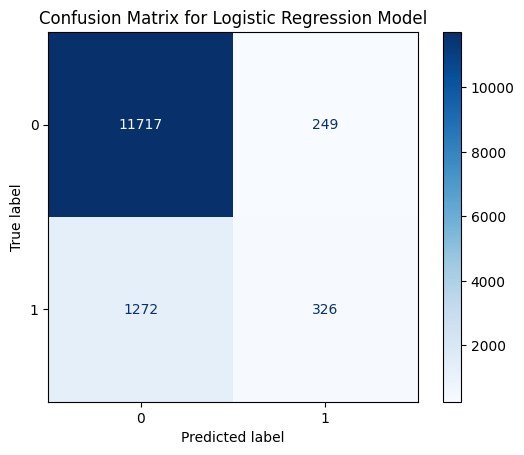

In [ ]:
#Train and Provide Confusion Matrix for LogisticRegression Model
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import matplotlib.pyplot as plt # Import matplotlib.pyplot


# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data as pandas DataFrames
X_df = bank_marketing.data.features
y_df = bank_marketing.data.targets

# Assuming the target variable is in y_df with a column named 'y'
y_series = y_df['y']

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}

# Fit and transform categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_df[feature] = le.fit_transform(X_df[feature])
    label_encoders[feature] = le

# Encode the target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_series) # Encode y_series
y_series = pd.Series(y_encoded) # Update y_series with encoded values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


<ipython-input-14-a52a70242959>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-14-a52a70242959>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-14-a52a70242959>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

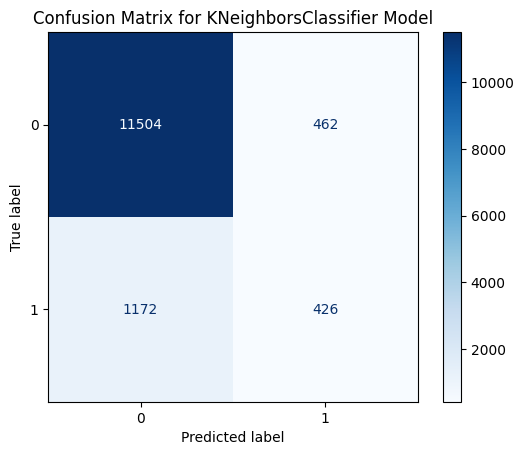

In [ ]:
# Train and Provide Confusion Matrix for KNeighborsClassifier
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data as pandas DataFrames
X_df = bank_marketing.data.features
y_df = bank_marketing.data.targets

# Assuming the target variable is in y_df with a column named 'y'
y_series = y_df['y']

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}

# Fit and transform categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_df[feature] = le.fit_transform(X_df[feature])
    label_encoders[feature] = le

# Encode the target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_series)
y_series = pd.Series(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3, random_state=42)

# Train the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix for KNeighborsClassifier Model")
plt.show()

<ipython-input-15-e22be9469092>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-15-e22be9469092>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[feature] = le.fit_transform(X_df[feature])
<ipython-input-15-e22be9469092>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

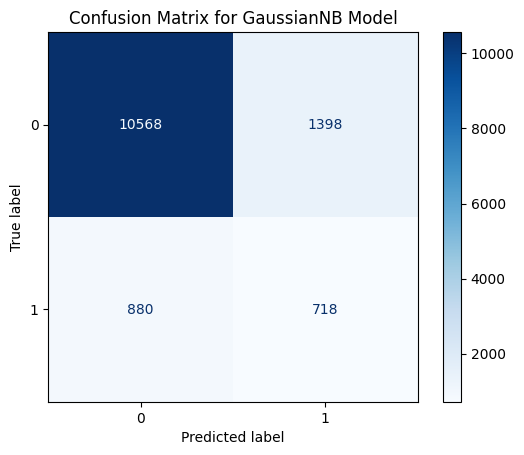

In [ ]:
# Train and Provide Confusion Matrix for GaussianNB
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data as pandas DataFrames
X_df = bank_marketing.data.features
y_df = bank_marketing.data.targets

# Assuming the target variable is in y_df with a column named 'y'
y_series = y_df['y']

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoders = {}

# Fit and transform categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_df[feature] = le.fit_transform(X_df[feature])
    label_encoders[feature] = le

# Encode the target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_series)
y_series = pd.Series(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3, random_state=42)

# Train the GaussianNB model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

Factors influencing model performance:

Data Characteristics:

Linearity/Non-linearity: Logistic Regression assumes a linear relationship between features and the target variable. If the relationship is highly non-linear, KNN or GaussianNB might perform better as they are non-linear models.
Feature Interactions: Some models, like KNN, can implicitly capture feature interactions, while others, like Logistic Regression, may need explicit interaction terms to be added.
Data Distribution: GaussianNB assumes features are normally distributed. If this assumption is violated, it might underperform.
Model Complexity:

Overfitting/Underfitting: More complex models (e.g., KNN with a small number of neighbors) are prone to overfitting, while simpler models (e.g., Logistic Regression) might underfit. The optimal complexity depends on the dataset's size and noise level.
Bias-Variance Trade-off: There's a trade-off between a model's bias (simplification of reality) and variance (sensitivity to training data). Simpler models have higher bias and lower variance, while complex models have lower bias and higher variance. Finding the right balance is crucial.
Model Assumptions:

Each model has underlying assumptions (e.g., GaussianNB's normality assumption). If these assumptions are violated, the model's performance might suffer.
Data Preprocessing: Some models are more sensitive to feature scaling or outliers than others. Proper preprocessing can significantly impact performance.
Hyperparameter Tuning:

Most models have hyperparameters that need to be tuned to achieve optimal performance. A poorly tuned model might underperform even if it's theoretically well-suited for the task.
Why a specific model might be better for bank marketing:

Logistic Regression: Often a good baseline for binary classification problems. It's relatively simple, interpretable, and computationally efficient. However, it might not capture complex relationships in the data.
KNeighborsClassifier: Can perform well if the decision boundaries are non-linear. It's a non-parametric model and doesn't make strong assumptions about the data distribution. However, it can be computationally expensive and sensitive to irrelevant features.
GaussianNB: A simple probabilistic model that can be surprisingly effective. It's computationally efficient and handles high-dimensional data well. However, its performance can be affected if the features are not normally distributed.
To determine which model is best for your specific bank marketing dataset, you should:

Experiment with different models: Try training and evaluating different models with various hyperparameter settings.
Use cross-validation: Evaluate models on unseen data using techniques like k-fold cross-validation to get a more robust estimate of performance.
Consider model interpretability: If you need to understand the factors driving predictions, choose a more interpretable model like Logistic Regression.
Balance accuracy and complexity: Find a model that achieves good accuracy without overfitting the data.
By carefully analyzing the data characteristics, model assumptions, and performance metrics, you can select the model that is most suitable for your bank marketing task.